## Observations and Insights 

In [529]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")

# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [336]:
zero_timepoint = df[df['Mouse ID'].str.match('b447')]
zero_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0


In [337]:
# Checking the number of mice.
unique_mice = df["Mouse ID"].unique()
print(f'The number of mice in the study is {len(unique_mice)}.')


The number of mice in the study is 249.


In [338]:
grouped_df = df.groupby(['Mouse ID'])

grouped_df.count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [339]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID'].value_counts()




g989    13
a644    10
p189    10
v923    10
t451    10
        ..
x226     1
b447     1
n482     1
x336     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [340]:
# Optional: Get all the data for the duplicate mouse ID. 
print(df.loc[(df["Mouse ID"]== "g989")])

# We can see Mouse ID g989 has duplicate data points for the same Timepoint

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [341]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a list that includes the rows that have duplicate data and attach variable to this list.
duplicate_data = df[(df["Mouse ID"] == "g989")].index

# Drop rows of duplicate data
clean_df = df.drop(duplicate_data)

#Check to see that Mouse ID with 13 data points has been dropped
clean_df['Mouse ID'].value_counts()

d251    10
j296    10
v923    10
t451    10
e476    10
        ..
n482     1
h428     1
x336     1
f932     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

In [342]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [343]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = clean_df["Mouse ID"].unique()
print(f'The number of mice in the study is {len(unique_mice_clean)}.')

The number of mice in the study is 248.


## Summary Statistics

In [344]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
grouped_drug_df = clean_df.groupby(["Drug Regimen"])
drug_tumour_mean = grouped_drug_df["Tumour Volume (mm3)"].mean()
drug_tumour_median = grouped_drug_df["Tumour Volume (mm3)"].median()
drug_tumour_var = grouped_drug_df["Tumour Volume (mm3)"].var()
drug_tumour_stdev = grouped_drug_df["Tumour Volume (mm3)"].std()
drug_tumour_sem = grouped_drug_df["Tumour Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stat_df = [drug_tumour_mean, drug_tumour_median, drug_tumour_var, drug_tumour_stdev, drug_tumour_sem]
merged_summary_stat_df = pd.concat(summary_stat_df, join="outer", axis=1)

# Rename columns of df.
merged_summary_stat_df.columns.values[0] = "Mean Tumour Vol"
merged_summary_stat_df.columns.values[1] = "Median Tumour Vol"
merged_summary_stat_df.columns.values[2] = "Variance Tumour Vol"
merged_summary_stat_df.columns.values[3] = "Std Dev Tumour Vol"
merged_summary_stat_df.columns.values[4] = "SEM Tumour Vol"

# Print df.
print(f'Summary Statistics Table for the Tumour Volume (mm3) of each Drug Regimen:')
merged_summary_stat_df

Summary Statistics Table for the Tumour Volume (mm3) of each Drug Regimen:


,Mean Tumour Vol,Median Tumour Vol,Variance Tumour Vol,Std Dev Tumour Vol,SEM Tumour Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [539]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df['Tumour Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
agg_df

mean      50.435293
median    48.933454
var       79.462907
std        8.914197
sem        0.205591
Name: Tumour Volume (mm3), dtype: float64

## Bar and Pie Charts

Text(0, 0.5, 'No. of Mice Tested')

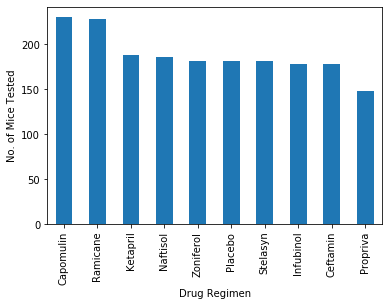

In [346]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_time = clean_df["Drug Regimen"].value_counts()
fig_1 = drug_and_time.plot(kind= 'bar')
fig_1.set_xlabel("Drug Regimen")
fig_1.set_ylabel("No. of Mice Tested")



In [347]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

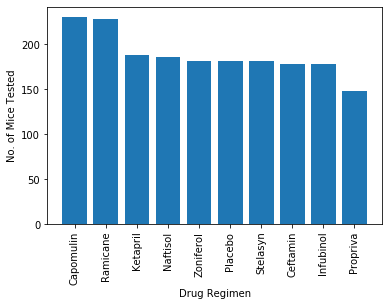

In [348]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_and_time_df = clean_df[["Drug Regimen", "Timepoint"]]
drug_and_time_df = drug_and_time_df.groupby(["Drug Regimen"])
drug_and_time_df = drug_and_time_df.count()
drug_and_time_df = drug_and_time_df.sort_values("Timepoint", ascending=False)


# Generate bar chart
plt.bar(drug_and_time_df.index, drug_and_time_df["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice Tested")
plt.xticks(rotation=90)




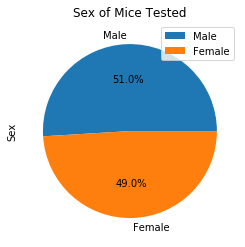

In [349]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_df = pd.DataFrame(clean_df["Sex"].value_counts())
sexes = ["Male", "Female"]

male_female_df.plot(kind='pie', y='Sex', autopct='%1.1f%%', title= "Sex of Mice Tested")


Text(0.5, 1.0, 'Sex of Mice Tested')

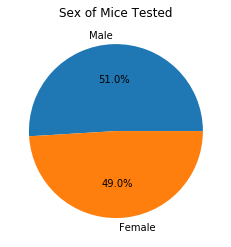

In [350]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female_df = pd.DataFrame(clean_df["Sex"].value_counts())
sexes = ["Male", "Female"]

plt.pie(male_female_df["Sex"], labels=male_female_df.index, autopct="%1.1f%%")
plt.title("Sex of Mice Tested")



## Quartiles, Outliers and Boxplots

In [351]:
# Get list of unique drug regimens
unique_drugs = clean_df["Drug Regimen"].unique()
unique_drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [352]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_df.groupby(["Mouse ID"])
last_tp_max = last_tp["Timepoint"].max()
last_tp_max_df = pd.DataFrame(last_tp_max)
last_tp_max_df

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
tumour_vol_full_df = pd.merge(last_tp_max_df, clean_df[["Mouse ID", "Timepoint", "Drug Regimen", "Tumour Volume (mm3)"]], how='inner', left_on=["Mouse ID", "Timepoint"], right_on=["Mouse ID", "Timepoint"])
tumour_vol_full_df = tumour_vol_full_df.set_index("Drug Regimen")
tumour_vol_df = tumour_vol_full_df.drop(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], axis=0)
tumour_vol_df = tumour_vol_df.reset_index()
tumour_vol_df.head()



,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
0,Infubinol,a203,45,67.973419
1,Infubinol,a251,45,65.525743
2,Ceftamin,a275,45,62.999356
3,Ramicane,a411,45,38.407618
4,Ramicane,a444,45,43.047543


In [353]:
# Get list of unique drugs for plotting
drug_list = tumour_vol_df["Drug Regimen"].unique()
drug_list

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [443]:
# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_list = {
    'Infubinol': [],
    'Ceftamin': [],
    'Ramicane': [],
    'Capomulin': []
}

# Locate the rows which contain mice on each drug and get the tumour volumes
# Append tumour vols into respective lists
for drug in drug_list:
    for index,row in tumour_vol_df.iterrows():
        if row["Drug Regimen"]== drug:
            tumour_vol_list[drug].append(row["Tumour Volume (mm3)"])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = {
    'Infubinol': [],
    'Ceftamin': [],
    'Ramicane': [],
    'Capomulin': []
}

for drug in drug_list:
    qrts = np.quantile(tumour_vol_list[drug], [0.25])
    quartiles[drug].append(qrts)
    qrts = np.quantile(tumour_vol_list[drug], [0.5])
    quartiles[drug].append(qrts)
    qrts = np.quantile(tumour_vol_list[drug], [0.75])
    quartiles[drug].append(qrts)

# Determine IQR
# Determine outliers using upper and lower bounds
outliers = {
    'Infubinol': [],
    'Ceftamin': [],
    'Ramicane': [],
    'Capomulin': []
}

for drug in drug_list:
    upper_bound = (quartiles[drug][2]+(1.5 * (quartiles[drug][2] - quartiles[drug][0])))
    lower_bound = (quartiles[drug][0]-(1.5 * (quartiles[drug][2] - quartiles[drug][0])))
    for i in tumour_vol_list[drug]:
        if i > upper_bound or i < lower_bound:
            outliers[drug].append(i)
    
    print(f"The interquartile range of Tumour Volumes for {drug} is from {quartiles[drug][0]} to {quartiles[drug][2]} mm3.")
    print(f'Outliers for {drug}: {outliers[drug]}')


The interquartile range of Tumour Volumes for Infubinol is from [54.04860769] to [65.52574285] mm3.
Outliers for Infubinol: [36.321345799999996]
The interquartile range of Tumour Volumes for Ceftamin is from [48.72207785] to [64.29983003] mm3.
Outliers for Ceftamin: []
The interquartile range of Tumour Volumes for Ramicane is from [31.56046955] to [40.65900627] mm3.
Outliers for Ramicane: []
The interquartile range of Tumour Volumes for Capomulin is from [32.37735684] to [40.1592203] mm3.
Outliers for Capomulin: []


In [482]:
# Create list from dictionary of lists for plotting
plot_tumour_vol = []

for drug in drug_list:
    plot_tumour_vol.append(tumour_vol_list[drug])

<function matplotlib.pyplot.show(*args, **kw)>

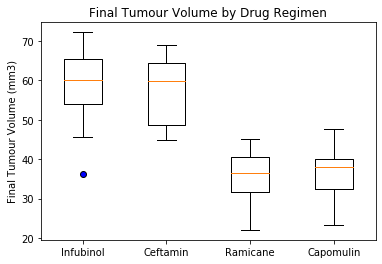

In [488]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
flierprops = {"marker": "o", "markerfacecolor": "blue"}
ax1.boxplot(plot_tumour_vol, flierprops=flierprops)
ax1.set_xticklabels(drug_list)
ax1.set_ylabel("Final Tumour Volume (mm3)")
ax1.set_title("Final Tumour Volume by Drug Regimen")
plt.show


## Line and Scatter Plots

In [526]:
# Create dataframe of all mice on Capomulin drug regimen to select individual
capo_only_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capo_only_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


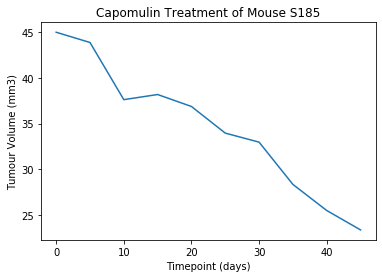

In [514]:
# Create dataframe of first individual (S185)
s185_df = capo_only_df.loc[capo_only_df["Mouse ID"] == "s185"]

# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
x_axis_s185 = s185_df['Timepoint']
y_axis_s185 = s185_df['Tumour Volume (mm3)']
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Capomulin Treatment of Mouse S185')
plt.plot(x_axis_s185, y_axis_s185)
plt.show()


Text(0, 0.5, 'Tumour Volume (mm3)')

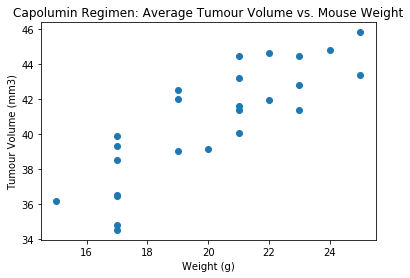

In [528]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen.

# Group Capomulin only dataframe by Mouse ID.
capo_grouped_df = capo_only_df.groupby(["Mouse ID"])

# Find average tumour volume for each individual - this will be y-axis.
y_axis_scatter = capo_grouped_df['Tumour Volume (mm3)'].mean()

# Find mouse weight for each individual - given weight is same across all timepoints for each individual, the average 
# weight for an individual is the mouses' weight - this will be x-axis.
x_axis_scatter = capo_grouped_df['Weight (g)'].mean()

# Generate scatter plot.
plt.scatter(x_axis_scatter, y_axis_scatter)
plt.title('Capolumin Regimen: Average Tumour Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')

## Correlation and Regression

The correlation coefficient for Mouse Weight (g) and Average Tumour Volume (mm3) for the Capomulin regimen is: 0.842
The linear regression model is described by y = 0.95x + 21.55


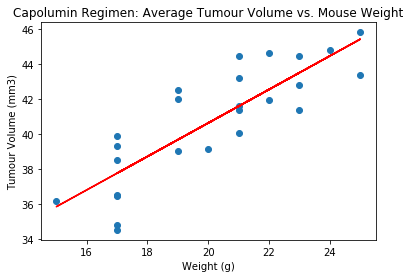

In [537]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

# Determine correlation coefficient
correlation = st.pearsonr(x_axis_scatter, y_axis_scatter)
print(f'The correlation coefficient for Mouse Weight (g) and Average Tumour Volume (mm3) for the Capomulin regimen is: {round(correlation[0],3)}')

# Determine linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regression_vals = x_axis_scatter * slope + intercept

plt.scatter(x_axis_scatter, y_axis_scatter)
plt.plot(x_axis_scatter, regression_vals, "r-")
plt.title('Capolumin Regimen: Average Tumour Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'The linear regression model is described by {line_eq}')